# Analisis Data Nilai Pegawai

## Pendahuluan
Pemerintah Provinsi Jawa Barat ingin mengevaluasi performa kinerja Aparatur Sipil Negara dengan melakukan penilaian pada setiap pegawai. Nilai yang dihasilkan merupakan hasil kalkulasi pembobotan dari beberapa kriteria yang sudah ditentukan. Kami ingin dapat mengevaluasi seluruh pegawai sehingga kami dapat mengklasifikasikan manakah pegawai dengan performa yang sangat baik dan sebaliknya. Hasil ini dapat menjadi _judgement_ yang adil dan menjadi _support_ untuk pengambilan kebijakan.

## Permasalahan
Dari data yang telah kami sediakan pada lampiran “Data Nilai Pegawai”, bagaimana _insight_ yang dapat anda temukan. Untuk hal-hal yang tidak anda ketahui, buatlah asumsi dan fokuslah untuk memberikan solusi. 

1. Berikan rekomendasi bagaimana anda dapat membandingkan performa satu pegawai dengan pegawai yang lain? 
2. Dapatkah anda menyimpulkan siapa pegawai yang memiliki performa yang sangat baik dan sebaliknya?

## Import Package and Load Data
Masukkan package yang yang akan digunakan dalam analisis data.

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
from scipy import stats

Selanjutnya adalah membaca file yang telah diberikan.

In [2]:
os.chdir("D:\\Jobs")
data = pd.read_excel("Data Nilai Pegawai.xlsx")

## Exploratory Data Analysis
Membaca kesimpulan awal dari data mengenai tipe data setiap kolom dan banyaknya _missing values_.

In [3]:
print(data)

    ID PERSON Tingkat Pendidikan Akhir  Usia Satuan Kerja Bulan    Nilai
0        1001                       S3    61      DINAS B  Juli  7.88436
1        1002                     SLTA    59      DINAS A  Juli  6.95183
2        1003                       S2    57      BADAN D  Juli  8.18452
3        1004                       SD    56      DINAS B  Juli  6.55612
4        1005                       D3    54      DINAS B  Juli  6.34694
5        1006                       D3    48      DINAS B  Juli  6.79435
6        1007                     SLTA    47      DINAS B  Juli  6.54592
7        1008                       S1    47      BADAN B  Juli  7.17857
8        1009                       D3    47      DINAS P  Juli  7.48516
9        1010                       D3    43      DINAS A  Juli  7.19048
10       1011                     SLTP    43      DINAS F  Juli  7.15193
11       1012                       D4    42      DINAS F  Juli  6.37670
12       1013                       S1    42      B

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
ID PERSON                   30 non-null int64
Tingkat Pendidikan Akhir    30 non-null object
Usia                        30 non-null int64
Satuan Kerja                30 non-null object
Bulan                       30 non-null object
Nilai                       30 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ KB


Data yang diberikan berisi 30 entri dan tidak mengandung _missing value_ sama sekali sehingga data valid untuk dianalisis.

In [5]:
data.describe(include='all')

,ID PERSON,Tingkat Pendidikan Akhir,Usia,Satuan Kerja,Bulan,Nilai
count,30.000000,30,30.000000,30,30,30.000000
unique,NaN,8,NaN,6,1,NaN
top,NaN,S1,NaN,DINAS P,Juli,NaN
freq,NaN,14,NaN,5,30,NaN
mean,1015.500000,NaN,40.233333,NaN,NaN,7.185791
std,8.803408,NaN,10.753294,NaN,NaN,0.484566
min,1001.000000,NaN,25.000000,NaN,NaN,6.346940
25%,1008.250000,NaN,32.500000,NaN,NaN,6.964457
50%,1015.500000,NaN,41.000000,NaN,NaN,7.179420
75%,1022.750000,NaN,47.000000,NaN,NaN,7.452400


Dari keterangan di atas, dapat dilihat bahwa terdapat delapan jenis tingkat pendidikan akhir, dengan tingkat pendidikan akhir terbanyak yaitu S1 (14 orang).
Sementara itu, rata-rata umur pegawai adalah 40.2 tahun. Pegawai termuda berusia 25 tahun dan pegawai tertua berusia 61 tahun. Nilai rata-rata pegawai adalah 7.19 secara keseluruhan, dengan nilai minimum 6.35 dan maksimum 8.40. Nilai-nilai tersebut akan diuraikan lebih lanjut untuk mendapatkan pola persebaran nilainya. Sebagai tambahan, kolom Bulan tidak menggambarkan apapun untuk data ini.

- Usia

Pegawai pemprov Jabar memiliki persebaran yang unik. Meskipun didominasi oleh rentang umur 35-50 tahun, pemprov Jabar ternyata saat ini mengandalkan anak-anak muda untuk menjalankan aktivitasnya. Terlihat dalam diagram batang bahwa pegawai dengan rentang usia 25-30 tahun juga unggul dalam segi jumlah. 

In [6]:
data["Usia"].value_counts()

25    5
42    3
47    3
43    2
39    2
41    2
34    1
35    1
38    1
40    1
61    1
28    1
48    1
27    1
54    1
56    1
57    1
59    1
32    1
Name: Usia, dtype: int64

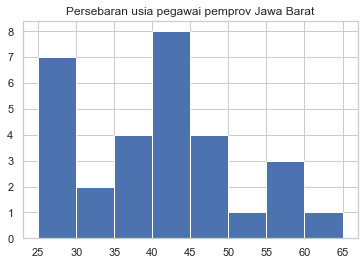

In [7]:
plt.hist(data["Usia"],bins=[25,30,35,40,45,50,55,60,65])
plt.title("Persebaran usia pegawai pemprov Jawa Barat")
plt.show()

- Satuan Kerja

Dalam data ini persebaran pegawai merata dengan diisi lima orang setiap badan atau dinas.

In [8]:
data["Satuan Kerja"].value_counts()

DINAS P    5
DINAS F    5
BADAN D    5
DINAS A    5
BADAN B    5
DINAS B    5
Name: Satuan Kerja, dtype: int64

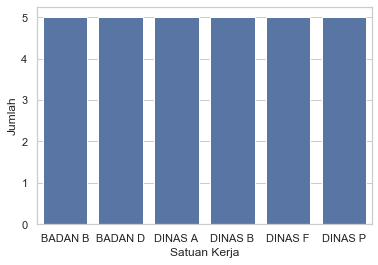

In [9]:
sns.countplot(x = data["Satuan Kerja"],color="b",order=["BADAN B","BADAN D","DINAS A","DINAS B","DINAS F","DINAS P"])
plt.ylabel('Jumlah')
plt.show()

- Tingkat Pendidikan Akhir

Berdasarkan tingkat pendidikan, pegawai pemprov Jabar didominasi oleh lulusan S1. Menyusul lulusan D3 dan SLTA di peringkat kedua dan ketiga.

In [10]:
data["Tingkat Pendidikan Akhir"].value_counts()

S1      14
D3       5
SLTA     4
D4       3
SLTP     1
SD       1
S3       1
S2       1
Name: Tingkat Pendidikan Akhir, dtype: int64

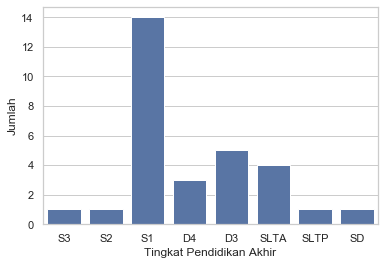

In [11]:
sns.countplot(x = data["Tingkat Pendidikan Akhir"],color="b",order=["S3","S2","S1","D4","D3","SLTA","SLTP","SD"])
plt.ylabel('Jumlah')
plt.show()

- Nilai

Untuk melihat persebaran nilai, ditampilkan dalam diagram batang dengan interval kelas 0.5, untuk rentang 6.0 hingga 8.5 supaya mencakup keseluruhan datanya. Dapat dilihat bahwa nilai pegawai pemprov Jabar adalah terdistribusi normal didominasi rentang nilai 7.0-7.5.

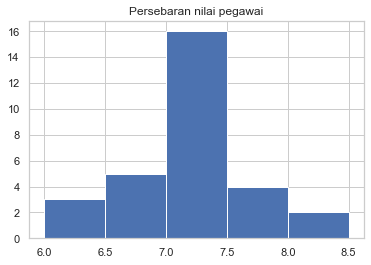

In [12]:
plt.hist(data["Nilai"], bins=[6.0,6.5,7.0,7.5,8.0,8.5])
plt.title("Persebaran nilai pegawai")
plt.show()

## Analisis Lanjut

Dari masing-masing penjelasan di atas, dapat dianalisis lebih lanjut persebaran nilai berdasakan fitur usia, satuan kerja, dan tingkat pendidikan pegawai. Analisis ini dilakukan untuk melihat hubungan ketiga fitur tersebut terhadap nilai pegawai.

In [13]:
fitur = ["Usia","Satuan Kerja","Tingkat Pendidikan Akhir","Nilai"]
data_fitur = data[fitur]

- Korelasi antara usia dan nilai pegawai

In [14]:
korelasi_usia_nilai = data_fitur.corr()
print(korelasi_usia_nilai)

           Usia     Nilai
Usia   1.000000 -0.127943
Nilai -0.127943  1.000000


C:\Users\Thomas\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


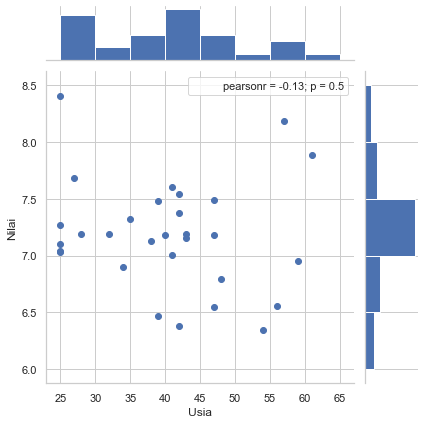

In [15]:
g = sns.JointGrid(x="Usia",y="Nilai", data= data_fitur)
_ = g.plot_joint(plt.scatter)
_ = g.ax_marg_x.hist(data_fitur["Usia"],bins=[25,30,35,40,45,50,55,60,65])
_ = g.ax_marg_y.hist(data_fitur["Nilai"],orientation="horizontal",bins=[6.0,6.5,7.0,7.5,8.0,8.5])
_ = g.annotate(stats.pearsonr)

Terlihat bahwa korelasi antara usia dan nilai ternyata kecil, yaitu -0.128, yang menunjukkan tidak ada hubungan antara usia dan nilai. Dengan kata lain, pegawai tua dan muda mampu menghasilkan nilai yang tinggi.

- Korelasi antara tingkat pendidikan dan nilai pegawai

In [16]:
data_fitur["Nilai"].groupby(data_fitur["Tingkat Pendidikan Akhir"]).mean().sort_values(ascending=False)

Tingkat Pendidikan Akhir
S2      8.184520
S3      7.884360
S1      7.320676
SLTP    7.151930
D3      6.999440
SLTA    6.944505
D4      6.844037
SD      6.556120
Name: Nilai, dtype: float64

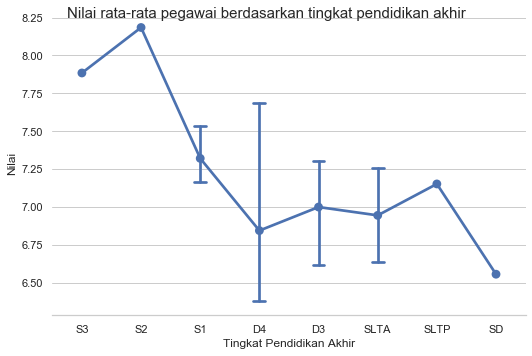

In [17]:
sns.catplot(x="Tingkat Pendidikan Akhir",y="Nilai",kind="point",data=data_fitur,
            order=["S3","S2","S1","D4","D3","SLTA","SLTP","SD"],
            capsize=.2,aspect=1.5)
sns.despine(left=True)
plt.suptitle("Nilai rata-rata pegawai berdasarkan tingkat pendidikan akhir",fontsize=15)
plt.show()

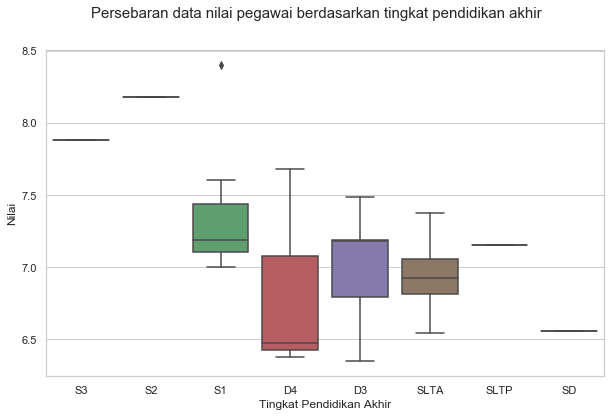

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Tingkat Pendidikan Akhir",y="Nilai",data=data_fitur,
            order=["S3","S2","S1","D4","D3","SLTA","SLTP","SD"])
plt.suptitle("Persebaran data nilai pegawai berdasarkan tingkat pendidikan akhir",fontsize=15)
plt.show()

Berdasarkan tingkat pendidikannya, nilai rata-rata pegawai terbaik adalah pegawai lulusan S2 dengan nilai 8.18, yang merupakan nilai sebenarnya dari satu orang, karena di dalam data pegawai hanya ada satu orang dengan lulusan S2.
Peringkat berikutnya disusul oleh pegawai S3 dan S1.

Hal menarik dapat dilihat dalam _boxplot_, karena hanya ditunjang oleh satu data, maka hanya terbentuk garis yang merupakan nilai asli kategori tersebut, seperti pada kategori S3, S2, SLTP, dan SD. Sementara, untuk kategori yang memiliki labih dari satu data, terbentuk zona interkuartil beserta garis mediannya. Pada kategori S1 juga terlihat bahwa terdapat _outliers_ yang nilainya sangat jauh dibandingkan dengan nilai-nilai lainnya, bahkan nilai individu tersebut lebih tinggi dari nilai pada kategori S3 dan S2.

Persebaran nilai untuk kategori D4 terkonsentrasi pada nilai sekitar 6.5, sedangkan untuk D3 di kisaran 7.25 yang terlihat garis median yang hampir berimpit dengan batas zona interkuartil. Persebaran data kategori SLTA dapat dikatakan merata.

- Korelasi antara satuan kerja dan nilai pegawai

In [19]:
data_fitur["Nilai"].groupby(data_fitur["Satuan Kerja"]).mean().sort_values(ascending=False)

Satuan Kerja
BADAN D    7.521354
DINAS A    7.388270
DINAS P    7.215886
BADAN B    7.123576
DINAS F    7.040122
DINAS B    6.825538
Name: Nilai, dtype: float64

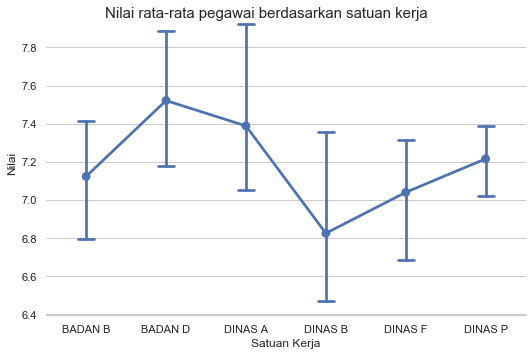

In [20]:
sns.catplot(x="Satuan Kerja",y="Nilai",kind="point",data=data_fitur,
            order=["BADAN B","BADAN D","DINAS A","DINAS B","DINAS F","DINAS P"],
            capsize=.2,aspect=1.5)
sns.despine(left=True)
plt.suptitle("Nilai rata-rata pegawai berdasarkan satuan kerja",fontsize=15)
plt.show()

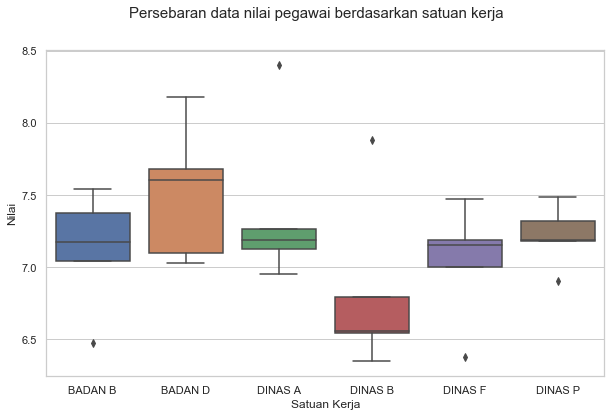

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Satuan Kerja",y="Nilai",data=data_fitur,
            order=["BADAN B","BADAN D","DINAS A","DINAS B","DINAS F","DINAS P"])
plt.suptitle("Persebaran data nilai pegawai berdasarkan satuan kerja",fontsize=15)
plt.show()

BADAN D memiliki nilai pegawai terbaik dibandingkan dengan satuan kerja lainnya dengan nilai rata-rata 7.52. Disusul oleh DINAS A dan DINAS P, dengan nilai masing-masing 7.39 dan 7.22.

Pada _boxplot_ terlihat hal yang menonjol pada sebagian besar kategori, yaitu memiliki _outliers_. Hal ini menandakan ada pegawai yang hasil kerjanya kontras dibandingkan dengan rekan-rekannya dalam satu satuan kerja. Pegawai dengan nilai lebih tinggi dalam satu satuan kerja terdapat di DINAS A dan DINAS B. Sedangkan, pegawai dengan nilai lebih rendah dibandingkan dengan rekan-rekan satu satuan kerjanya terdapat di BADAN B, DINAS F, dan DINAS P.

Secara keseluruhan nilai pegawai berada pada rentang 7.0-7.5, kecuali pada DINAS B yang kebanyakan diisi pegawai dengan nilai rendah, yaitu di bawah 7.0. Persebaran nilai pegawai dalam satu satuan kerja sebagian besar tidak merata, yang dapat dilihat dari garis median yang tidak persis di tengah-tengah kotak.

- Memoroskan data nilai pegawai terhadap satuan kerja dan tingkat pendidikan akhir.

In [22]:
pd.pivot_table(data_fitur,index=["Satuan Kerja","Tingkat Pendidikan Akhir"],
               values=["Nilai"],aggfunc=({"Nilai":["min","max",np.mean,"count"]}))

Nilai                            
                                      count      max      mean      min
Satuan Kerja Tingkat Pendidikan Akhir                                  
BADAN B      D4                           1  6.47174  6.471740  6.47174
             S1                           3  7.54592  7.255887  7.04317
             SLTA                         1  7.37848  7.378480  7.37848
BADAN D      D4                           1  7.68367  7.683670  7.68367
             S1                           3  7.60423  7.246193  7.03231
             S2                           1  8.18452  8.184520  8.18452
DINAS A      D3                           1  7.19048  7.190480  7.19048
             S1                           3  8.40363  7.599680  7.13010
             SLTA                         1  6.95183  6.951830  6.95183
DINAS B      D3                           2  6.79435  6.570645  6.34694
             S3                           1  7.88436  7.884360  7.88436
             SD                           1  6.55612  6.556120  6.55612
             SLTA                         1  6.54592  6.545920  6.54592
DINAS F      D4                           1  6.37670  6.376700  6.37670
             S1                           3  7.47704  7.223993  7.00234
             SLTP                         1  7.15193  7.151930  7.15193
DINAS P      D3                           2  7.48516  7.332715  7.18027
             S1                           2  7.32173  7.256105  7.19048
             SLTA                         1  6.90179  6.901790  6.90179

- Grafik nilai rata-rata pegawai setiap satuan kerja dalam berbagai tingkat pendidikan



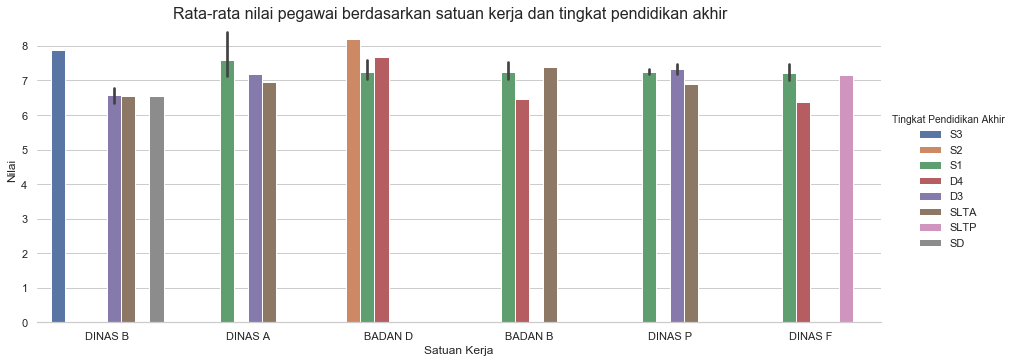

In [23]:
sns.catplot(x="Satuan Kerja",y="Nilai",hue="Tingkat Pendidikan Akhir",data=data_fitur,
            kind="bar",hue_order=["S3","S2","S1","D4","D3","SLTA","SLTP","SD"],
            aspect=2.5)
sns.despine(left=True)
plt.suptitle("Rata-rata nilai pegawai berdasarkan satuan kerja dan tingkat pendidikan akhir",
             fontsize=16,
             position= (0.45,1),va="top")
plt.show()

Setiap satuan kerja sebagian besar diisi oleh pegawai dengan tiga jenis tingkat pendidikan, kecuali DINAS B yang memiliki empat jenis. Secara umum, tidak semua tingkat pendidikan berada dalam satuan kerja.

DINAS B memiliki perbedaan tingkat pendidikan terjauh, yaitu dari S3 lalu langsung ke D3 dan di bawahnya, serta efeknya terhadap nilai yang demikian jauh perbedaannya. Sementara satuan kerja lain, perbedaannya tidak jauh. Dapat disimpulkan bahwa _gap_ antara tingkat pendidikan berpengaruh terhadap nilai pegawai dalam satu satuan kerja.

Nilai pegawai yang tinggi dapat dilihat di satuan kerja BADAN D yang memiliki nilai di atas 7. Oleh karena itu, sebagai acuan untuk pegawai dengan performa terbaik disarankan berdasarkan rata-rata nilai pegawai di BADAN D.

# Rekomendasi

Dari tabel di atas, rata-rata nilai BADAN D paling tinggi karena ada satu pegawai lulusan S2 yang memiliki nilai yang tinggi, yaitu 8.18. Nilai ini juga yang paling tinggi di antara tingkat pendidikan yang lain karena hanya satu pegawai yang merupakan lulusan S2. Sementara itu, nilai tertinggi diperoleh oleh pegawai lulusan S1 yang berada di DINAS A dengan nilai 8.40. DINAS A sendiri memiliki nilai rata-rata kedua tertinggi.

Untuk menentukan performa, diperlukan nilai ambang batas atau _threshold_ sehingga seorang pegawai dapat dikategorikan memiliki performa sangat baik atau tidak. Oleh karena itu, nilai ambang batas dapat ditentukan dari fitur-fitur yang mempengaruhi nilai pegawai, yaitu tingkat pendidikan akhir, usia, dan satuan kerja.

Berdasarkan tingkat pendidikan akhir, 30 pegawai berasal dari kategori pendidikan yang berbeda-beda. Sebagian besar kategori pun hanya diisi satu orang. Nilai rata-rata berdasarkan tingkat pendidikan akhir banyak didominasi oleh satu orang sehingga kurang adil untuk menentukan batas nilai berdasarkan pendidikan. Berdasarkan usia pun demikian sulit karena tidak ada korelasi antara usia dan nilai pegawai.

Penentuan paling mudah yang bisa dijelaskan adalah berdasarkan nilai rata-rata pegawai dalam satuan kerja. Hal ini terlihat bahwa pegawai bekerja untuk satuan kerja tersebut sehingga nilai yang diperolehnya pun berdasarkan hasil kerja untuk satuan kerja tersebut. Untuk mengkategorikan performa pegawai yang sangat baik bisa dilihat dari satuan kerja yang memilki nilai rata-rata pegawai tertinggi sebagai nilai ambang batasnya, yaitu BADAN D dengan nilai 7.52 atau dibulatkan menjadi 7.50.

Untuk meningkatkan kinerja dari tiap pegawai, sebaiknya dalam satu satuan kerja jangan dibiarkan ada perbedaan rentang pendidikan yang terlalu jauh. Perbedaan jenjang pendidikan yang kecil akan membuat pegawai tidak tertekan dalam bekerja.

## Pegawai dengan Performa Terbaik

Berikut merupakan pegawai yang dikategorikan berperforma sangat baik berdasarkan nilai ambang batas yang dipilih. Sebagian besar pegawai merupakan lulusan S1, S2, dan S3 serta tentunya sebagian besar berasal dari BADAN D yang merupakan asal nilai yang dipilih untuk menentukan nilai ambang batas. Sisi menarik dari segi usia, sesuai dengan nilai korelasi, bahwa pegawai muda dan pegawai tua mampu berperforma sangat baik.

In [24]:
thresh = data_fitur["Nilai"].groupby(data_fitur["Satuan Kerja"]).mean().max().round(1)
data["Performa Sangat Baik"] = data["Nilai"].apply(lambda x: "YA" if x >= thresh else "TIDAK")
data[data["Performa Sangat Baik"] == "YA"]

,ID PERSON,Tingkat Pendidikan Akhir,Usia,Satuan Kerja,Bulan,Nilai,Performa Sangat Baik
0,1001,S3,61,DINAS B,Juli,7.88436,YA
2,1003,S2,57,BADAN D,Juli,8.18452,YA
12,1013,S1,42,BADAN B,Juli,7.54592,YA
14,1015,S1,41,BADAN D,Juli,7.60423,YA
24,1025,D4,27,BADAN D,Juli,7.68367,YA
27,1028,S1,25,DINAS A,Juli,8.40363,YA


Berdasarkan hasil analisis yang telah dilakukan, diperoleh enam orang pegawai yang termasuk memiliki performa yang sangat baik. Kembali melihat plot antara satuan kerja dan nilai, pegawai yang menunjukkan nilai yang tinggi (kontras) terhadap pegawai lain di dalam satuan kerjanya termasuk kategori ini. Dapat disimpulkan bahwa untuk Bulan Juli memang enam orang pegawai ini yang terbaik.

# Penutup

Demikian rekomendasi dan hasil yang telah dibuat berdasarkan analisis pada data pegawai pemerintah Provinsi Jawa Barat. Terima kasih.